In [1]:
pwd

'C:\\Users\\Abhishek\\Downloads'

In [2]:
cd C:\\Users\\Abhishek\\Downloads

C:\Users\Abhishek\Downloads


In [3]:
import pandas as pd
import numpy as np
import visuals  as vs

%matplotlib inline
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#sklearn.cross_validation new name is sklearn.model_selection
data = pd.read_csv('housing.csv')
data
price=data['MEDV']
feature=data.drop('MEDV',axis=1)
print(price)
print(feature)



0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
5      602700.0
6      480900.0
7      569100.0
8      346500.0
9      396900.0
10     315000.0
11     396900.0
12     455700.0
13     428400.0
14     382200.0
15     417900.0
16     485100.0
17     367500.0
18     424200.0
19     382200.0
20     285600.0
21     411600.0
22     319200.0
23     304500.0
24     327600.0
25     291900.0
26     348600.0
27     310800.0
28     386400.0
29     441000.0
         ...   
459    350700.0
460    252000.0
461    306600.0
462    449400.0
463    483000.0
464    497700.0
465    525000.0
466    457800.0
467    432600.0
468    445200.0
469    401100.0
470    432600.0
471    319200.0
472    147000.0
473    170100.0
474    285600.0
475    422100.0
476    457800.0
477    514500.0
478    485100.0
479    413700.0
480    384300.0
481    445200.0
482    367500.0
483    352800.0
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489,

In [4]:
data.shape

(489, 4)

In [37]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [38]:
data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [40]:
#import warnings
#warnings.filterwarnings("ignore")
data.nunique

<bound method DataFrame.nunique of         RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
5    6.430   5.21     18.7  602700.0
6    6.012  12.43     15.2  480900.0
7    6.172  19.15     15.2  569100.0
8    5.631  29.93     15.2  346500.0
9    6.004  17.10     15.2  396900.0
10   6.377  20.45     15.2  315000.0
11   6.009  13.27     15.2  396900.0
12   5.889  15.71     15.2  455700.0
13   5.949   8.26     21.0  428400.0
14   6.096  10.26     21.0  382200.0
15   5.834   8.47     21.0  417900.0
16   5.935   6.58     21.0  485100.0
17   5.990  14.67     21.0  367500.0
18   5.456  11.69     21.0  424200.0
19   5.727  11.28     21.0  382200.0
20   5.570  21.02     21.0  285600.0
21   5.965  13.83     21.0  411600.0
22   6.142  18.72     21.0  319200.0
23   5.813  19.88     21.0  304500.0
24   5.924  16.30     21.0  327600.0
25 

In [41]:
# Check for missing values
data.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [49]:
# Viewing the data statistics
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [42]:
#See rows with missing values
data[data.isnull().any(axis=1)]

,RM,LSTAT,PTRATIO,MEDV


In [52]:
corr = data.corr()
corr.shape

(4, 4)

### Univariate analysis


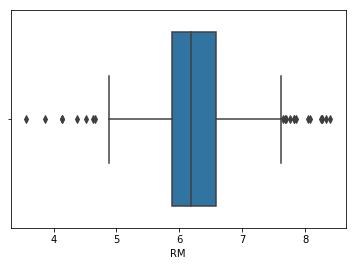

In [44]:
import seaborn as sns
sns.boxplot(x=data['RM'])

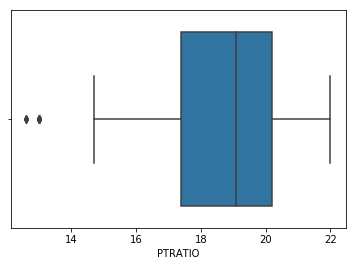

In [45]:
sns.boxplot(x=data.PTRATIO)

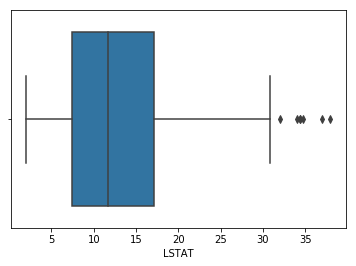

In [46]:
sns.boxplot(x=data.LSTAT)

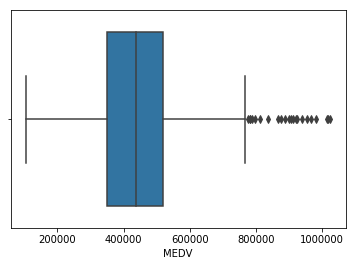

In [48]:
sns.boxplot(x=data['MEDV'])

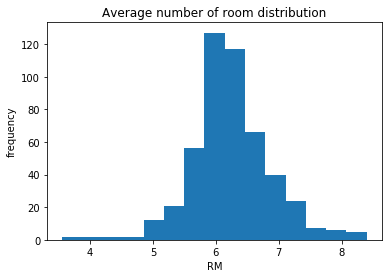

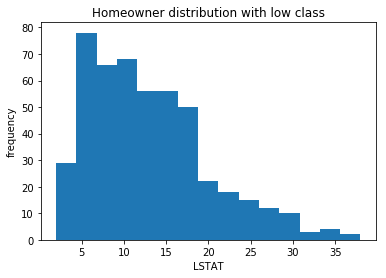

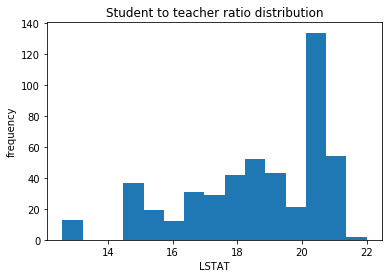

In [5]:
#DISTRIBUTION OF DATA
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['RM'],bins=15)
plt.title('Average number of room distribution')
plt.xlabel("RM")
plt.ylabel('frequency')
plt.show()

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['LSTAT'],bins=15)
plt.title('Homeowner distribution with low class')
plt.xlabel('LSTAT')
plt.ylabel('frequency')
plt.show()

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(data['PTRATIO'],bins=15)
plt.title('Student to teacher ratio distribution')
plt.xlabel('LSTAT')
plt.ylabel('frequency')
plt.show()

Minimum price: $105000.0
Maximum price: $1024800.0
Mean or average price : $454342.9447852761
Meadian price: $438900.0
standard deviation of price : $165171.13154429477


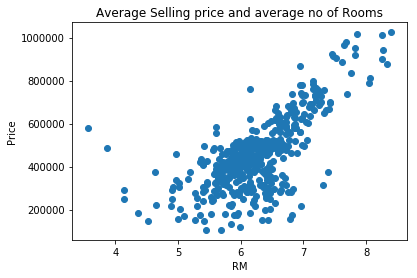

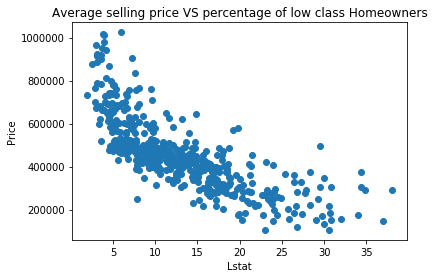

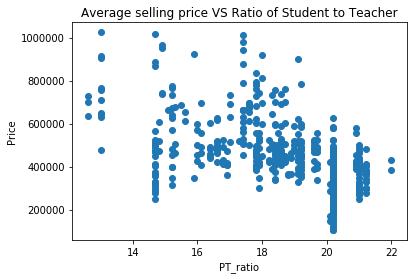

In [6]:
#DATA EXPLORATION
min_price=np.min(price)
max_price=np.max(price)
mean_price=np.mean(price)
median_price=np.median(price)
std_price=np.std(price)
print("Minimum price: ${}".format(min_price))
print("Maximum price: ${}".format(max_price))
print('Mean or average price : ${}'.format(mean_price))
print("Meadian price: ${}".format(median_price))
print("standard deviation of price : ${}".format(std_price))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(data['RM'],data['MEDV'])
plt.title('Average Selling price and average no of Rooms')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(data['LSTAT'],data['MEDV'])
plt.title('Average selling price VS percentage of low class Homeowners')
plt.xlabel('Lstat')
plt.ylabel('Price')
plt.show()

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(data['PTRATIO'],data['MEDV'])
plt.title('Average selling price VS Ratio of Student to Teacher')
plt.xlabel('PT_ratio')
plt.ylabel('Price')
plt.show()

### Bivariate analysis

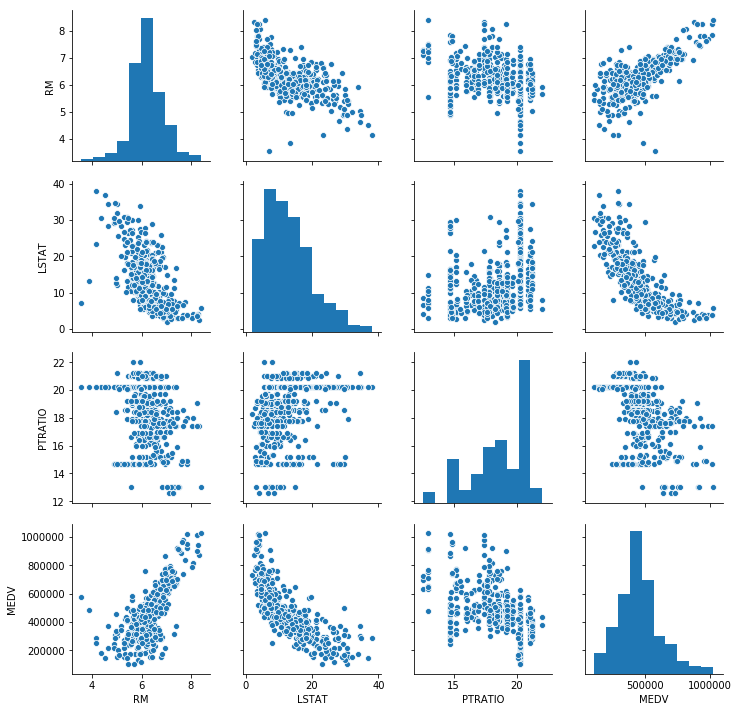

In [55]:
sns.pairplot(data)

#### Q.1 Feature Observation
Ans 1.RM 
- For a higher RM,one would expect to observe a high MEDV
- this is because more rooms would imply more space.hence its cost is more
2.LSTAT
- for a higher LSTAT one would expect to observe a lower MEDV
3.PTRATIO
- For a higher PTRATIO,one would expect to observe a lower MEDV


### Linear regression

In [27]:
import warnings
warnings.filterwarnings("ignore")
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Value of y intercept
lm.intercept_

457234.8678956443

In [29]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,80797
1,LSTAT,-11066.5
2,PTRATIO,-19577


In [30]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [31]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.72961525700365
Adjusted R^2: 0.7273744994650062
MAE: 62746.13862244425
MSE: 6988876069.806015
RMSE: 83599.49802364853


In [7]:
#Define a Performance metric
from sklearn.metrics import r2_score
def perfomence_metric(y_true,y_predict):
    score=r2_score(y_true,y_predict)
    return(score)

score=perfomence_metric([3,-.5,2,7,4.2],[2.5,0.0,2.1,7.8,5.3])
print('Model has a cofficient of determination R^2 of {:.3f}'.format(score))

Model has a cofficient of determination R^2 of 0.923


### SVM

In [32]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()


In [34]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [36]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.008793990810635366
Adjusted R^2: -0.01715416200519848
MAE: 119344.9468606841
MSE: 26075199745.407722
RMSE: 161478.17111116822


#### Q.2 Goodnees of Fit
Answer:
- R^2=92.3%
- This implies 92.3% of variation is explained by the target variable and it seems to be high.The 
model has a fairly strong correlation and has successfully capture the variation of the target variable
- we have only five points here,and it may be hard to draw conclusion that is statistically significant 
.Some more data point may or perhaps helped to improve the model

In [8]:
#implementation of shuffle and split data
X_train,X_test,y_train,y_test=train_test_split(feature,price,test_size=None,random_state=0)
print("Training and Testing split was successful ")

Training and Testing split was successful 


#### Q.3 Training and Testing
 What is the benefit to spliting a dataset into some ratio of training and testing subsets for a
learning algorithm
Answer:
- If we are building a model and checking the performance of the model on the same data our model 
will lead to overfitting and it will perform worst on the unseen data.That's why We use the training data
to train the model.and then We use testing data to checking the performance of the model.
it's important that two sets are independent from each other or result will be baised.

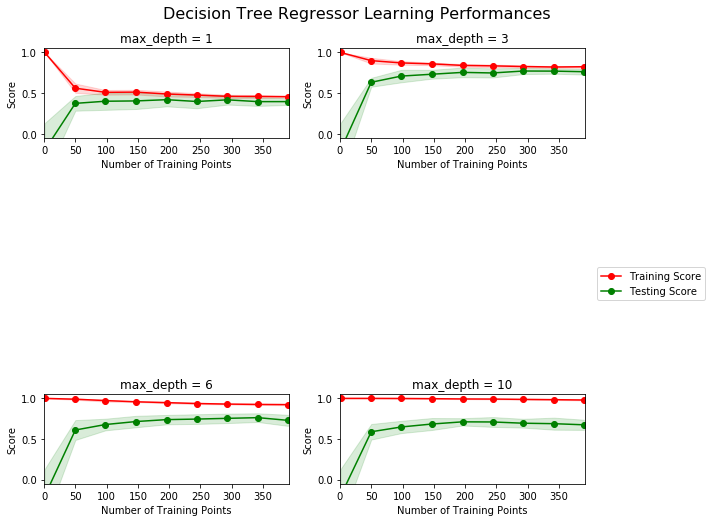

In [9]:
#Analyzing Model perfomence
vs.ModelLearning(feature,price)

#### Q.4 Learning the data
- Choose one of the graphs above and state the maximum depth for the model
- what happens to the score of the training curve as more training points are added?What about the
testing curve
- Would having more training points benefits the model

Answer:

1. max_depth=1(high bias scenario)
    - we can see how the testing score increases with the number of obsevation.
    - However,the testing score only increases to approximately 0.4,a low score.
    this indicates how the model does not generalizes well for new unseen data.
    - moreover,the training score(red line) decreases with the number of observation .Also the 
    training score decreases to a very low score of apprex 0.4.This indicates how the model does not 
    seem to fit the data well.
    - Thus,we can say this model is facing a high bias problem.consequently,having more trainig points
    would not benefit the model as the model is underfitting the dataset.instead,one should inrcrese
    the model complexity to better fit the dataset.morever,the testing score has reached a plateau 
    suggesting the model may not improve from adding more training points .
    
2.max_depth=3(Ideal Scenario)
- Testing score(green line) increses with trainig points.
    - Reaches~0.8
    - high score 
    - Generalize well
-Training score(redline)decreases slightly with training points.
    - Reachers~0.8
    - High score
    - Fit dataset well
- There seems to be no high bias or high variance problem
    - Model fits and generalizes well.
    - Ideal
    - more training points should help it become an even more ideal model.
    
3.max_depth=10(High variance scenario)
- Testing score(green line)increases with training points
    - Reaches~0.7
    - Not so high score
    - Does not generalize well
- Trainig score(red line)barely decreases with training points
    - At~1.0
    - Almost perfect score
    - Overfitting dataset
- There seems to be a high variance problem
    - overfitting
    - More training points might help
    - This is getting close to the ideal scenario.

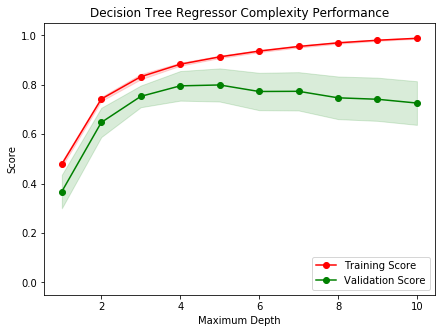

In [10]:
vs.ModelComplexity(X_train,y_train)

#### Q.5 Bias-variance tradeoff
- When the model is trained with a maximum depth of 1,does the model suffer from high bias or from 
high variance?
- How about when the model is trained with a maximum depth of 10 ?What visual cues in the graph 
justify your conclusion?

Answer:
- It is easy to identify wheather the model is suffering from a high bias or a high variance.
    - High variance models have a gap between the training andvalidation scores.
    - This is because it is able to fit the model well but unable to generalize well resulting 
    in a high training score but low validation score.
    - High bias models have a small or no gap between the training and validation score.
    - This is because it is unable to fit the model well and unable to generalize well resulting
    in both score converging to a similar low score.
- Maximum depth of 1:High Bias
    - Both training and testing score is low.
    - There is barely gap betwwen training and testing score.
    - This indicate that model is not fitting the dataet well and not generalize well .Hence
    model is suffering from high bias.
- maximum depth of 10:High variance
    - Both training and testing score is low.
    - There is substantial gap betwwen training and testing scores.
    - This indicate that model is  fitting the dataet well but not generalizing  well .Hence
    model is suffering from high variance.


#### Q.6 Best-Guess optimal Model
- Which maximum depth do you think results in a model that best generalizes to unseen data?
- What intuition lead you to this answer?

Answer:
- The maximum depth of 5.
- The training score seems to plateau here,indicating the highest possible score for the model's
ability to generalize to unseen data.
- Gap between the training score and testing score does not seem to be substantial too,indicating that
the model may not suffering from a high variance scenario.
    

#### Q.7 Grid Search
- What is the grid search technique?
- How it can be applied to optimize a learning algorithm

Answer:
    
For a family of models with different values of parameters,grid search allows to select the best 
possible model for prediction by allowing us to specify which of those parameters we want to change,
their corresponding rangues and the function score to be optimized.it then gives us a combination
of values for those parameters that optimize the scoring function by searching each of those models 
iteratively

grid search performs hyperparameter optimization by selecting a grid of values,evaluating them and 
returning the result.This parameter sweep functionality of grid search can optimize a learning algorithm


#### Q.8 Cross-validation
- What is the k-fold cross-validation training technique
- What benefit does this technique provide for grid search when optimizing a model

Answer:

- K-fold cross-validation summary
    - dataset is split into k 'folds' of equal size
    - Each fold acts as a testing set 1 time, and acts as the training set k-1 times.
    - Average testing performance is used as the estimate of out-of-sample performance.
    - Also known as cross-validated performance.
    
- Benefits of k-fold cross-validation
    - More reliable estimate of out of sample performance than train/test split.
    - Reduce the variance of a single trail of a train/test split.
    - Hence,the benefits of k-fold cross-validation,we are able to use the average testing accuracy
    as a benchmark to decide which is the most optimal set of parameter for the learning algorithm.
    - If we dont using of k-fold cross-validation set and we run Grid-search, we would have different
    set of optimal parameters due to the fact that without a cross-validation set,the estimate
    of out-of-sample performance would have a high variance
    - in,summary,without k-fold cross-validation the risk is higher that Grid search will select
    hyper-parameter value combinations that perform very well on a specific train-test split but 
    poorly otherwise.
- Limitation of k-fold cross-validation
    - it does not work well when dataset is not uniformly distributed(e.g. sorted data)

In [11]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
def fit_model(X,y):
    cv_sets=ShuffleSplit(n_splits=10, test_size='default', random_state=None)
    #cv_sets=ShuffleSplit(X.shape[0],test_size='default',random_state=None)
    regressor= DecisionTreeRegressor(random_state=0)
    params={'max_depth':list(range(1,11))}
    scoring_fnc=make_scorer(perfomence_metric)
    grid=GridSearchCV(regressor,params,cv=cv_sets,scoring=scoring_fnc)
    grid=grid.fit(X,y)
    return(grid.best_estimator_)  


#### Q.9 Optimal Model
- What maximum depth does the optimal model have? How does this result compare to your guess in
question 6?


In [12]:
reg=fit_model(X_train,y_train)
print(reg.get_params()['max_depth'])

4


Answer:

- The optimal model has a maximum depth of 5.The max_depth is the same as my guess in question 6

#### Q.10 Predicting selling prices
imagine that you were a real estate agent in the Boston area looking to use this model to help prices 
homes owned by your clients that they wish to sell. You have collected the following information from 
three of your clients:
    
#### Feature-------------------- Client 1------------------Client 2------------------ Client 3
Total no. of rooms in home        5 rooms                   4 rooms                     8 rooms

Neighbourhood poverty level         17%                        32%                        3%

Student/Teacher ratio of nearby     15:1                       22:1                      12:1
school

In [13]:
client_data=[[5,17,15],
            [4,32,22],
            [8,3,12]]
for i,price in enumerate(reg.predict(client_data)):
    print('predicted selling price for client {}  home : ${:.2f}'.format(i+1,price))

predicted selling price for client 1  home : $393093.75
predicted selling price for client 2  home : $230865.96
predicted selling price for client 3  home : $1021650.00


#### Q.11 Applicability
- In a few sentances,discuss wheather the constructed model should or should not be used in a real 
world setting
- How relevant today is data that was collected from 1978?How important is inflation?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire 
neighborhood?

Answer:
    
- Data collected from a rural city may not be applicable as the demographics would change and other 
features may be better able to fit the dataset instead of a model with features that was learned using
urban data.
- The learning algorithm learned from a very old dataset that may not be relevent because demographics
have changed a lot since 1978.
- There are only 3 features currently,there are more features that can be included such as crime rates,
nearby to city,public transport access and more.